# Wincor Customer Churn Analysis

An analysis of customer Churn data using classification methods including: Logistic Regression and Decision Tree models.

## Business Problem

Wincor, as an Internet Service Provider (ISP), is committed to ensuring customer satisfaction and reducing churn rates. Churn refers to the situation where customers decide to cancel their subscriptions or switch to a different service provider. To address this challenge, Wincor aims to understand why some customers choose to leave and, more importantly, how to prevent it.

The core goal of this analysis is to predict which customers are at risk of churning and to proactively implement strategies that will encourage them to stay. By identifying the factors that influence customer churn, Wincor can tailor its services and customer support to meet the specific needs and expectations of its clientele. Ultimately, the objective is to maintain a loyal customer base and enhance overall customer satisfaction.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz, plot_tree
from IPython.display import Image
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.model_selection import cross_val_score

## Importing the data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data understanding

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.Churn.value_counts(normalize = True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Description

The dataset contains relevant customer account data including:

##### - Customer_id: Unique identifier for each customer
##### - Age: Represents the age of the customer
##### - Gender: Categorical variable representing the gender of the customer(0: Male, 1: Female)
##### - Revenue_Total: Represents the total revenue generated by each customer(continuous variable)
##### - N_Purchases: Represents the total number of purchases made by each customer
##### - Purchase_VALUE: Represents the value of the latest purchase made by each customer(continuous variable)
##### - Pay_Method: Categorical variable indicating the payment method used by the customer(0: Digital Wallets, 1: Card, 2: PayPal, 3: Other)
##### - Time_Spent: Represents the total time spent by the customer on the website
##### - Browser: Categorical variable indicating the web browser used by the customer to access the website(0: Chrome, 1: Safari, 2: Edge, 3: Other)
##### - Newsletter: Binary variable indicating whether the customer is subscribed to the newsletter
##### - Voucher: Binary variable representing whether the customer has used a voucher
##### - Purchase_Date: represents the data when the latest purchase was made

## Data Cleaning

In [6]:
import pandas as pd

# create a dictionary to map the string boolean to numeric boolean
bool_map = {'Yes': 1, 'No': 0}

# List the columns you want to convert
columns_to_convert = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'Churn'
]

# Apply the map to the necessary columns
for col in columns_to_convert:
    df[col] = df[col].map(bool_map)


In [7]:
# Updated dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     6361 non-null   float64
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    5517 non-null   float64
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  5517 non-null   float64
 12  TechSupport       5517 non-null   float64
 13  StreamingTV       5517 non-null   float64
 14  StreamingMovies   5517 non-null   float64
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


## Data Exploration

In [8]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [9]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

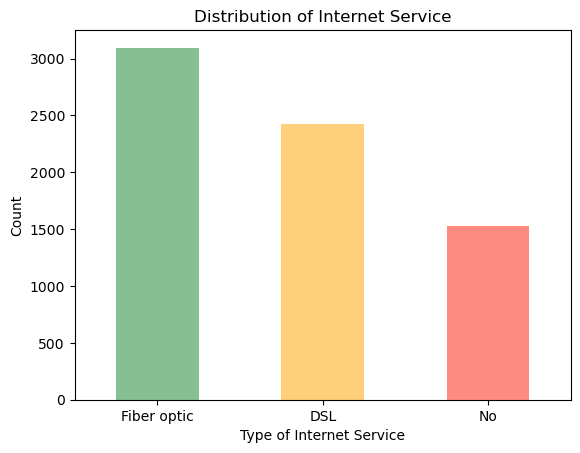

In [10]:
internet_service_counts = df['InternetService'].value_counts()

internet_service_counts.plot(kind='bar', color=['#86bf91', '#ffd07b', '#ff8b80'])
plt.title('Distribution of Internet Service')
plt.xlabel('Type of Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=0)  # This will keep the x-axis labels horizontal
plt.show()

Wincor offers a variety of internet services to cater to different customer needs. The popularity of each service type can be an important factor in understanding customer preferences and tailoring retention strategies. 

In [11]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
0.0    3498
1.0    2019
Name: count, dtype: int64

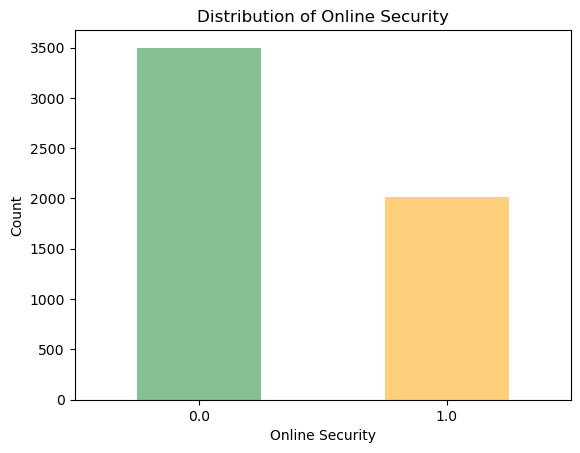

In [12]:
online_security_counts = df['OnlineSecurity'].value_counts()
colors = ['#86bf91', '#ffd07b', '#ff8b80']  # Assign more colors if needed
online_security_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Online Security')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.xticks(rotation=0)  # This will keep the x-axis labels horizontal
plt.show()

Customers who value online security may be less likely to churn if they perceive that their data and online activities are well-protected. Wincor might consider promoting online security features to attract and retain more customers in the future.

In [13]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

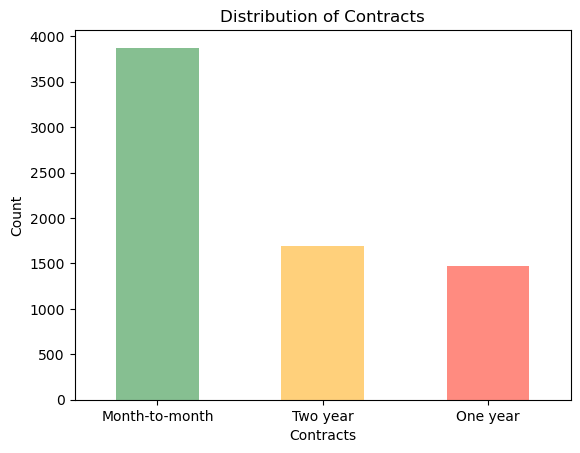

In [14]:
contract_counts = df['Contract'].value_counts()
colors = ['#86bf91', '#ffd07b', '#ff8b80']  
contract_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Contracts')
plt.xlabel('Contracts')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.show()

It's likely that customers with longer-term contracts are less likely to churn, while those on month-to-month contracts may have a higher churn rate. Wincor may consider incentivizing longer-term contracts to improve customer retention.

In [15]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

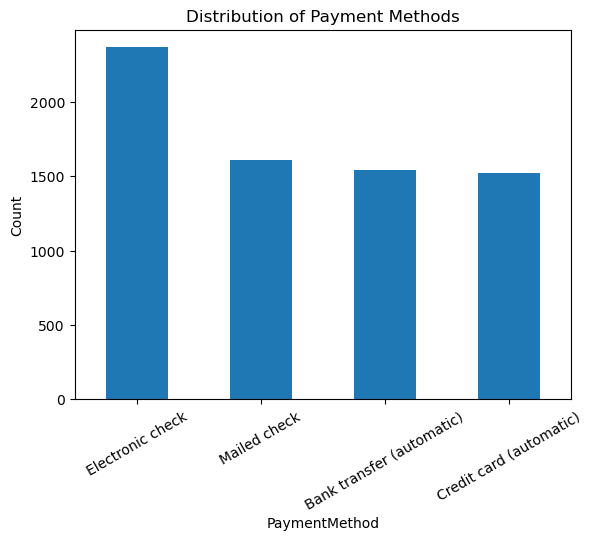

In [16]:
methods_counts = df['PaymentMethod'].value_counts() 
methods_counts.plot(kind='bar')
plt.title('Distribution of Payment Methods')
plt.xlabel('PaymentMethod')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.xticks(rotation=30)
plt.show()

Customers with automatic payment methods may have lower churn rates compared to those using less automated methods like electronic checks or mailed checks. Wincor could encourage customers to switch to automatic payment methods to improve retention.

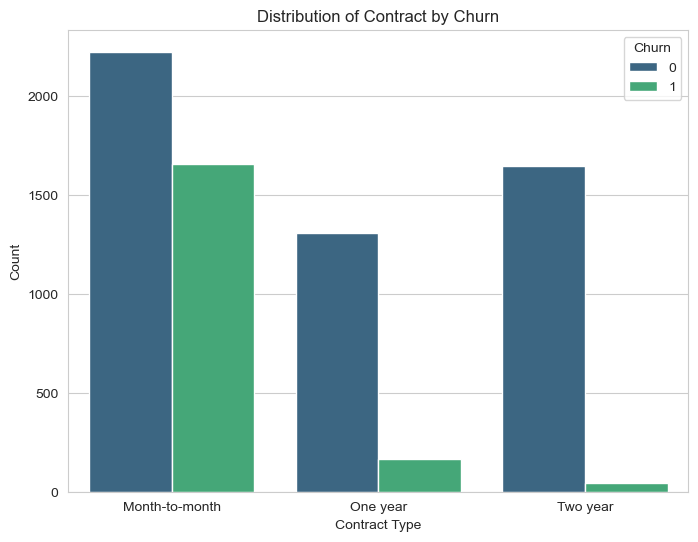

In [17]:
sns.set_style("whitegrid")

# Create the Countplot
plt.figure(figsize=(8,6))  # Set the size of the figure
sns.countplot(x='Contract', hue='Churn', data=df, palette='viridis')

# Set the title and labels of the plot
plt.title('Distribution of Contract by Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')

# Show the plot
plt.show()


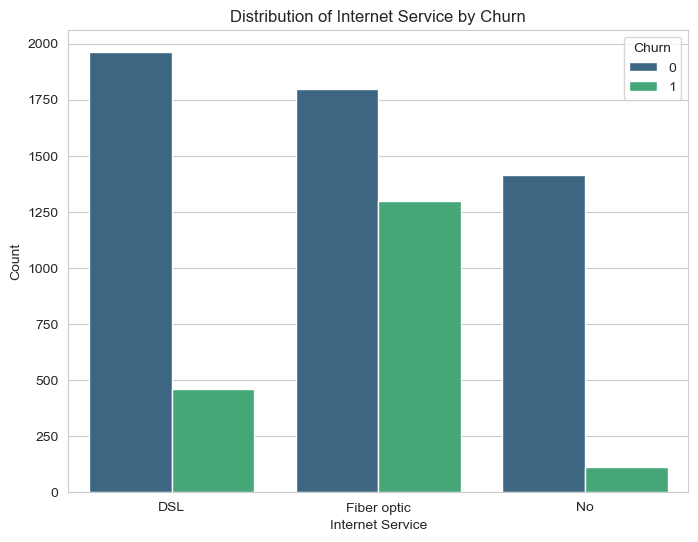

In [18]:
sns.set_style("whitegrid")

# Create the Countplot
plt.figure(figsize=(8,6))  # Set the size of the figure
sns.countplot(x='InternetService', hue='Churn', data=df, palette='viridis')

# Set the title and labels of the plot
plt.title('Distribution of Internet Service by Churn')
plt.xlabel('Internet Service')
plt.ylabel('Count')

# Show the plot
plt.show()


## Drop Columns

In [19]:
# Drop area_code and phone_number from the data
df = df.drop(['gender', 'customerID', 'Partner', 'OnlineBackup', 'MultipleLines', 'StreamingTV', 'StreamingMovies', 'TechSupport', 'DeviceProtection', 'OnlineSecurity'], axis=1)
df

,SeniorCitizen,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,DSL,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,34,1,DSL,One year,0,Mailed check,56.95,1889.5,0
2,0,0,2,1,DSL,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,45,0,DSL,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,2,1,Fiber optic,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,24,1,DSL,One year,1,Mailed check,84.80,1990.5,0
7039,0,1,72,1,Fiber optic,One year,1,Credit card (automatic),103.20,7362.9,0
7040,0,1,11,0,DSL,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,0,4,1,Fiber optic,Month-to-month,1,Mailed check,74.40,306.6,1


In [20]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [21]:
df.dtypes

SeniorCitizen         int64
Dependents            int64
tenure                int64
PhoneService          int64
InternetService      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

## Creating lists of columns

In [22]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [23]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [24]:
cat_columns = ['InternetService', 'Contract', 'PaymentMethod']
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
binary_columns = ['SeniorCitizen', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

## Split Data into Training and Testing sets

In [25]:
# Seperate data into X and y for analysis
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [26]:
# Perform train/test split on data in order to check for overfitting within the models
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
X_train.shape, y_train.shape

((5274, 10), (5274,))

In [28]:
X_test.shape, y_test.shape

((1758, 10), (1758,))

## Dealing with Missing Data

In [29]:
X_train.isna().sum()

SeniorCitizen       0
Dependents          0
tenure              0
PhoneService        0
InternetService     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

## Dealing with Categorical Data

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5274 entries, 3166 to 862
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     5274 non-null   int64  
 1   Dependents        5274 non-null   int64  
 2   tenure            5274 non-null   int64  
 3   PhoneService      5274 non-null   int64  
 4   InternetService   5274 non-null   object 
 5   Contract          5274 non-null   object 
 6   PaperlessBilling  5274 non-null   int64  
 7   PaymentMethod     5274 non-null   object 
 8   MonthlyCharges    5274 non-null   float64
 9   TotalCharges      5274 non-null   float64
dtypes: float64(2), int64(5), object(3)
memory usage: 453.2+ KB


## One-Hot encoding 

In [31]:
# Initialize the OneHotEncoder with drop_first and without sparse_output
ohe = OneHotEncoder(handle_unknown="ignore", drop='first', sparse=False)

In [32]:
cat_columns = ['InternetService', 'Contract', 'PaymentMethod']

# Creating copies of our data for preprocessing
X_train_fill_na_copy = X_train.copy()
X_test_fill_na_copy = X_test.copy()

# Selecting only the categorical columns from the copies
X_train_categorical = X_train_fill_na_copy[cat_columns]
X_test_categorical = X_test_fill_na_copy[cat_columns]

In [33]:
ohe = OneHotEncoder(drop='first', sparse=False)
# Fitting and transforming the training data
X_train_ohe = ohe.fit_transform(X_train_categorical)

In [34]:
# Getting the one-hot encoded column names
ohe_column_names = ohe.get_feature_names_out(input_features=cat_columns)

In [35]:
# Creating DataFrames with one-hot encoded columns and appropriate column names
X_train_ohe_df = pd.DataFrame(
    X_train_ohe, 
    columns=ohe_column_names,
    index=X_train_fill_na_copy.index
)

In [36]:
# Repeating the same process for the test data
X_test_ohe = ohe.transform(X_test_categorical)
X_test_ohe_df = pd.DataFrame(
    X_test_ohe, 
    columns=ohe_column_names,
    index=X_test_fill_na_copy.index
)

## Scaling

In [37]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

In [38]:
# Fitting and transform the training data
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])

In [39]:
# Transforming the test data (using the same scaler)
X_test_scaled = scaler.transform(X_test[numerical_columns])

In [40]:
# Creating DataFrames with scaled columns
X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    columns=numerical_columns,
    index=X_train.index
)

In [41]:
X_test_scaled_df = pd.DataFrame(
    X_test_scaled,
    columns=numerical_columns,
    index=X_test.index
)

## Combining DataFrames

In [42]:
binary_columns = ['SeniorCitizen', 'Dependents', 'PhoneService', 'PaperlessBilling']
X_train_binary = X_train[binary_columns].copy()
X_test_binary = X_test[binary_columns].copy()
X_train_final = pd.concat([X_train_scaled_df, X_train_binary,X_train_ohe_df], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test_binary,X_test_ohe_df], axis=1)

## SMOTE

In [43]:
# Creating a SMOTE (Synthetic Minority Over-sampling Technique) object
smote = SMOTE(random_state=42)

In [44]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train)

In [45]:
y_train_resampled.value_counts(normalize=True)

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

# Modeling

## Logistic Regression

In [46]:
# Defining a baseline logistic regression model
baseline_model = LogisticRegression(random_state=42)

In [47]:
baseline_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

### Predict

In [48]:
# Making predictions on both the training set (y_hat_train) and the test set (y_hat_test)
y_hat_train = baseline_model.predict(X_train_resampled)
y_hat_test = baseline_model.predict(X_test_final)

## Evaluation metrics

In [49]:
# Calculating different evaluation metrics
accuracy = accuracy_score(y_train_resampled, y_hat_train)
precision = precision_score(y_train_resampled, y_hat_train)
recall = recall_score(y_train_resampled, y_hat_train)
f1 = f1_score(y_train_resampled, y_hat_train)
roc_auc = roc_auc_score(y_train_resampled, y_hat_train)

accuracy_test = accuracy_score(y_test, y_hat_test)
precision_test = precision_score(y_test, y_hat_test)
recall_test = recall_score(y_test, y_hat_test)
f1_test = f1_score(y_test, y_hat_test)
roc_auc_test = roc_auc_score(y_test, y_hat_test)


print("Accuracy train:", accuracy)
print("Accuracy test:", accuracy_test)
print()
print("Precision train:", precision)
print("Precision test:", precision_test)
print()
print("Recall train:", recall)
print("Recall test:", recall_test)
print()
print("F1 Score train:", f1)
print("F1 Score test:", f1_test)
print()
print("ROC AUC Score train:", roc_auc)
print("ROC AUC Score test:", roc_auc_test)


Accuracy train: 0.7733626714988351
Accuracy test: 0.7372013651877133

Precision train: 0.7508313539192399
Precision test: 0.49722222222222223

Recall train: 0.8182759513331608
Recall test: 0.7816593886462883

F1 Score train: 0.7831041744085222
F1 Score test: 0.6078098471986417

ROC AUC Score train: 0.7733626714988351
ROC AUC Score test: 0.7515989250923749


- True Positives (TP): These are cases where the model correctly predicted that a customer would churn, and indeed, the customer did churn
- True Negatives (TN): These are cases where the model correctly predicted that a customer wouldn't churn, and indeed, the customer didn't churn
- False Positives (FP): These are cases where the model incorrectly predicted that a customer would churn, but in reality, the customer didn't churn
- False Negatives (FN): These are cases where the model incorrectly predicted that a customer wouldn't churn, but in reality, the customer did churn 
  
In the context of reducing customer churn for an Internet Service Provider (ISP), we  prioritize recall. ( "Of all the people who left, how many did we catch or find?")

It helps Wincor identify at-risk customers and take action to retain them, ultimately reducing churn rates and improving customer satisfaction.

# Decision Tree

In [50]:
# Creating a decision tree classifier 
decision_basemodel = DecisionTreeClassifier(random_state=42)
decision_basemodel.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

## Predict

In [51]:
y_pred_a_tree = decision_basemodel.predict(X_train_resampled)  
y_pred_b_tree = decision_basemodel.predict(X_test_final)  

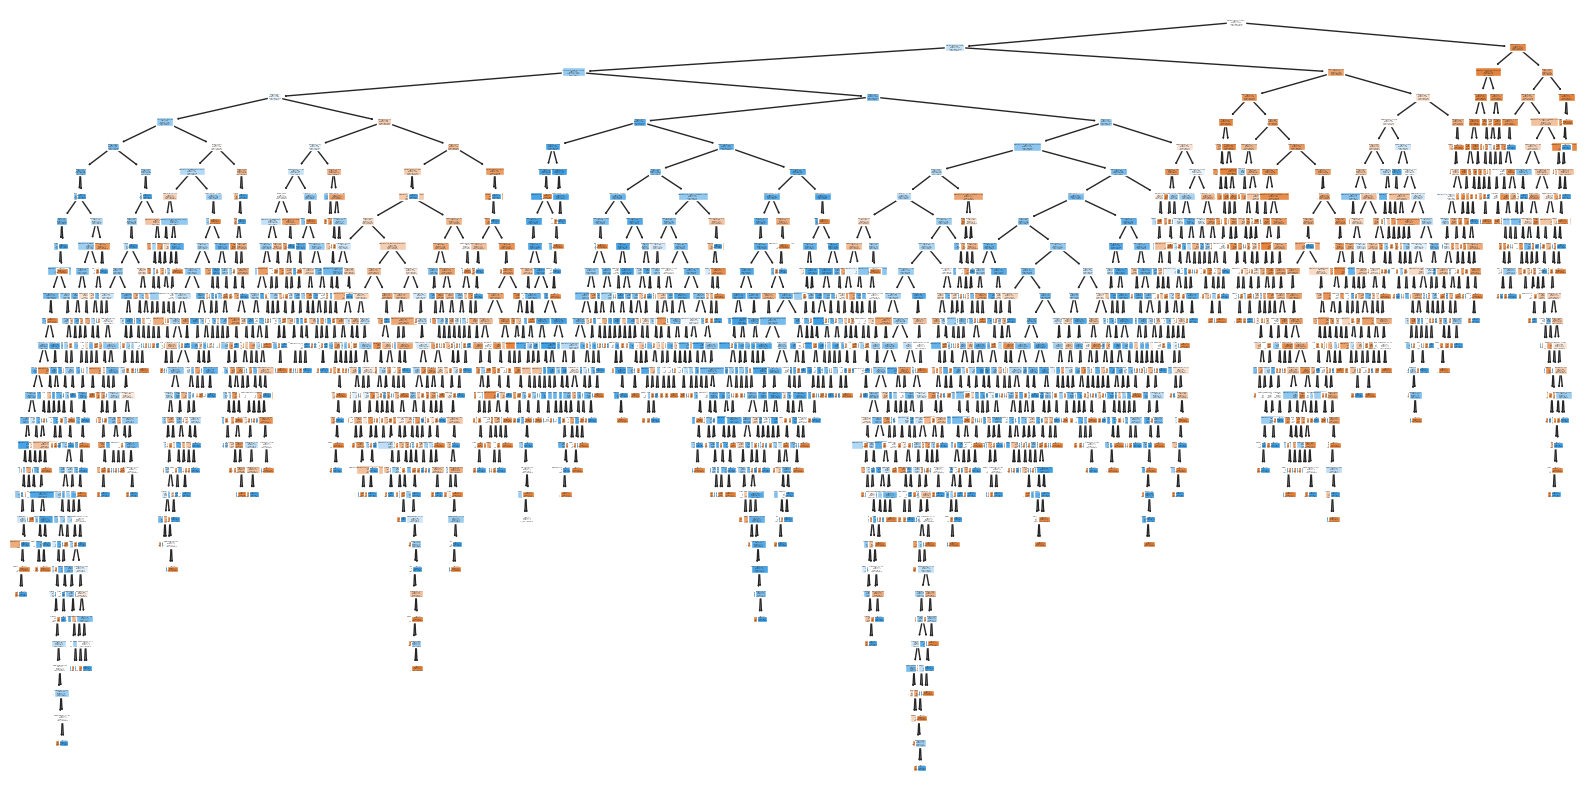

In [52]:
# Creating a decision tree visualization
plt.figure(figsize=(20, 10))
plot_tree(decision_basemodel, filled=True, feature_names=X_train_resampled.columns, class_names=['No Churn', 'Churn'])
plt.show()

## Evaluation metrics(decision tree)

In [53]:
recall = recall_score(y_train_resampled, y_pred_a_tree)
recall_test = recall_score(y_test, y_pred_b_tree)

print("Recall train:", recall)
print("Recall test:", recall_test)

Recall train: 0.9968936060056951
Recall test: 0.5436681222707423


### Cross_validation(decision tree)

In [54]:
cv_scores = cross_val_score(decision_basemodel, X_train_resampled, y_train_resampled, cv=5, scoring='recall')

print("Cross-Validation Scores:", cv_scores)
print("Mean Recall:", cv_scores.mean())

Cross-Validation Scores: [0.67658473 0.70595855 0.81217617 0.82664942 0.81888745]
Mean Recall: 0.7680512638331244


## Hyper parameters search in decision tree model

### Hyperparameter search for the max_depth parameter in decision tree model

In [55]:
max_depth_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

recall_train_scores = []
recall_test_scores = []

for max_depth in max_depth_list:
    dmax_depth_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dmax_depth_model.fit(X_train_resampled, y_train_resampled)
    

    recall_scores = cross_val_score(dmax_depth_model, X_train_resampled, y_train_resampled, cv=5, scoring='recall')
    mean_recall = recall_scores.mean()
    
    y_hat_train = dmax_depth_model.predict(X_train_resampled)
    y_hat_test = dmax_depth_model.predict(X_test_final)
    
    recall_train = recall_score(y_train_resampled, y_hat_train)
    recall_test = recall_score(y_test, y_hat_test)
    recall_train_scores.append(recall_train)
    recall_test_scores.append(recall_test)
    
    print(f"Max Depth = {max_depth}")
    print(f"Cross-Validation Mean Recall: {mean_recall}")
    print(f"Recall for Training Data: {recall_train}")
    print(f"Recall for Test Data: {recall_test}")
    print()

Max Depth = 1
Cross-Validation Mean Recall: 0.9790336418904879
Recall for Training Data: 0.9792907067046337
Recall for Test Data: 0.9781659388646288

Max Depth = 2
Cross-Validation Mean Recall: 0.9106941530541794
Recall for Training Data: 0.911208904996117
Recall for Test Data: 0.87117903930131

Max Depth = 3
Cross-Validation Mean Recall: 0.9106941530541794
Recall for Training Data: 0.911208904996117
Recall for Test Data: 0.87117903930131

Max Depth = 4
Cross-Validation Mean Recall: 0.8216453625937568
Recall for Training Data: 0.8156872896712399
Recall for Test Data: 0.7663755458515283

Max Depth = 5
Cross-Validation Mean Recall: 0.8169677389083645
Recall for Training Data: 0.818793683665545
Recall for Test Data: 0.759825327510917

Max Depth = 6
Cross-Validation Mean Recall: 0.8529717338409668
Recall for Training Data: 0.8716023815687289
Recall for Test Data: 0.8056768558951966

Max Depth = 7
Cross-Validation Mean Recall: 0.8363917581054903
Recall for Training Data: 0.8578824747605488


- If we would prioritize a simpler model with good generalization, we might choose max_depth = 2 or max_depth = 3. These depths strike a reasonable balance between complexity and performance. However, because we prioritize achieving the highest recall possible and are willing to accept some risk of overfitting, we will opt for max_depth = 1.

### Hyperparameter search for the max_features parameter in decision tree model

In [56]:
max_features_list = [None, 'sqrt', 'log2', 0.2, 0.5, 0.8]

recall_train_scores = []
recall_test_scores = []

for max_features in max_features_list:
    max_features_model = DecisionTreeClassifier(max_features=max_features, random_state=42)
    max_features_model.fit(X_train_resampled, y_train_resampled)
    
    recall_scores = cross_val_score(max_features_model, X_train_resampled, y_train_resampled, cv=5, scoring='recall')
    
    mean_recall = recall_scores.mean()
    
    y_hat_train = max_features_model.predict(X_train_resampled)
    y_hat_test = max_features_model.predict(X_test_final)
    
    recall_train = recall_score(y_train_resampled, y_hat_train)
    recall_test = recall_score(y_test, y_hat_test)
    
    recall_train_scores.append(recall_train)
    recall_test_scores.append(recall_test)
    
    print(f"Max Features = {max_features}")
    print(f"Cross-Validation Mean Recall: {mean_recall}")
    print(f"Recall for Training Data: {recall_train}")
    print(f"Recall for Test Data: {recall_test}")
    print()

Max Features = None
Cross-Validation Mean Recall: 0.7680512638331244
Recall for Training Data: 0.9968936060056951
Recall for Test Data: 0.5436681222707423

Max Features = sqrt
Cross-Validation Mean Recall: 0.7947070494473454
Recall for Training Data: 0.9968936060056951
Recall for Test Data: 0.5611353711790393

Max Features = log2
Cross-Validation Mean Recall: 0.7947070494473454
Recall for Training Data: 0.9968936060056951
Recall for Test Data: 0.5611353711790393

Max Features = 0.2
Cross-Validation Mean Recall: 0.7841067370918767
Recall for Training Data: 0.9968936060056951
Recall for Test Data: 0.5676855895196506

Max Features = 0.5
Cross-Validation Mean Recall: 0.7652025283365396
Recall for Training Data: 0.9968936060056951
Recall for Test Data: 0.5589519650655022

Max Features = 0.8
Cross-Validation Mean Recall: 0.7747833285295833
Recall for Training Data: 0.9968936060056951
Recall for Test Data: 0.5611353711790393



- We maximizing recall on the test data while controlling for overfitting, we will consider max_features = 0.2 as it strikes a balance between model complexity and performance.

### Hyperparameter search for the min_samples_split in decision tree model

In [57]:
min_samples_split_list = [2, 5, 10, 20, 50]

recall_train_scores = []
recall_test_scores = []

for min_samples_split in min_samples_split_list:
    decision_tree_model = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=42)
    decision_tree_model.fit(X_train_resampled, y_train_resampled)
    
    recall_scores = cross_val_score(decision_tree_model, X_train_resampled, y_train_resampled, cv=5, scoring='recall')
    
    mean_recall = recall_scores.mean()
    
    y_hat_train = decision_tree_model.predict(X_train_resampled)
    y_hat_test = decision_tree_model.predict(X_test_final)
    
    recall_train = recall_score(y_train_resampled, y_hat_train)
    recall_test = recall_score(y_test, y_hat_test)
    
    recall_train_scores.append(recall_train)
    recall_test_scores.append(recall_test)
    
    print(f"Min Samples Split = {min_samples_split}")
    print(f"Cross-Validation Mean Recall: {mean_recall}")
    print(f"Recall for Training Data: {recall_train}")
    print(f"Recall for Test Data: {recall_test}")
    print()

Min Samples Split = 2
Cross-Validation Mean Recall: 0.7680512638331244
Recall for Training Data: 0.9968936060056951
Recall for Test Data: 0.5436681222707423

Min Samples Split = 5
Cross-Validation Mean Recall: 0.7478641186682664
Recall for Training Data: 0.9526274915868496
Recall for Test Data: 0.5087336244541485

Min Samples Split = 10
Cross-Validation Mean Recall: 0.7540760377775841
Recall for Training Data: 0.9202692208128398
Recall for Test Data: 0.5589519650655022

Min Samples Split = 20
Cross-Validation Mean Recall: 0.7582201100617338
Recall for Training Data: 0.8873932177064457
Recall for Test Data: 0.5676855895196506

Min Samples Split = 50
Cross-Validation Mean Recall: 0.7864346567106154
Recall for Training Data: 0.8495987574424023
Recall for Test Data: 0.5960698689956332



- Based on the goal of maximizing test recall while minimizing overfitting, we will consider either min_samples_split = 20 as our best choice

### Hyperparameter search for the criterion parameter in decision tree model

In [58]:
criterion_list = ['gini', 'entropy']

recall_train_scores = []
recall_test_scores = []

for criterion in criterion_list:
    decision_tree_model = DecisionTreeClassifier(criterion=criterion, random_state=42)
    decision_tree_model.fit(X_train_resampled, y_train_resampled)
    
    recall_scores = cross_val_score(decision_tree_model, X_train_resampled, y_train_resampled, cv=5, scoring='recall')
    
    mean_recall = recall_scores.mean()
    
    y_hat_train = decision_tree_model.predict(X_train_resampled)
    y_hat_test = decision_tree_model.predict(X_test_final)
    
    recall_train = recall_score(y_train_resampled, y_hat_train)
    recall_test = recall_score(y_test, y_hat_test)
    
    recall_train_scores.append(recall_train)
    recall_test_scores.append(recall_test)
    
    print(f"Criterion = {criterion}")
    print(f"Cross-Validation Mean Recall: {mean_recall}")
    print(f"Recall for Training Data: {recall_train}")
    print(f"Recall for Test Data: {recall_test}")
    print()

Criterion = gini
Cross-Validation Mean Recall: 0.7680512638331244
Recall for Training Data: 0.9968936060056951
Recall for Test Data: 0.5436681222707423

Criterion = entropy
Cross-Validation Mean Recall: 0.7613208748634283
Recall for Training Data: 0.9968936060056951
Recall for Test Data: 0.5698689956331878



- While the cross-validation mean recall is slightly lower for "entropy," it has a higher recall on the test data (0.570) compared to "gini" (0.544). Since maximizing recall on the test data is a priority, "entropy" is the better criterion choice in this case

### Hyperparameter search for the min_samples_leaf parameter in decision tree model

In [59]:
min_samples_leaf_list = [1, 2, 3, 4, 5]

recall_train_scores = []
recall_test_scores = []

for min_samples_leaf in min_samples_leaf_list:
    decision_tree_model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    decision_tree_model.fit(X_train_resampled, y_train_resampled)
    
    recall_scores = cross_val_score(decision_tree_model, X_train_resampled, y_train_resampled, cv=5, scoring='recall')
    
    mean_recall = recall_scores.mean()
    
    y_hat_train = decision_tree_model.predict(X_train_resampled)
    y_hat_test = decision_tree_model.predict(X_test_final)
    
    recall_train = recall_score(y_train_resampled, y_hat_train)
    recall_test = recall_score(y_test, y_hat_test)
    
    recall_train_scores.append(recall_train)
    recall_test_scores.append(recall_test)
    
    print(f"min_samples_leaf = {min_samples_leaf}")
    print(f"Cross-Validation Mean Recall: {mean_recall}")
    print(f"Recall for Training Data: {recall_train}")
    print(f"Recall for Test Data: {recall_test}")
    print()

min_samples_leaf = 1
Cross-Validation Mean Recall: 0.7680512638331244
Recall for Training Data: 0.9968936060056951
Recall for Test Data: 0.5436681222707423

min_samples_leaf = 2
Cross-Validation Mean Recall: 0.7274108680934922
Recall for Training Data: 0.9156096298213824
Recall for Test Data: 0.49344978165938863

min_samples_leaf = 3
Cross-Validation Mean Recall: 0.7517487884495505
Recall for Training Data: 0.9202692208128398
Recall for Test Data: 0.5436681222707423

min_samples_leaf = 4
Cross-Validation Mean Recall: 0.73051867094759
Recall for Training Data: 0.8785917680559151
Recall for Test Data: 0.5240174672489083

min_samples_leaf = 5
Cross-Validation Mean Recall: 0.7520021583360703
Recall for Training Data: 0.8907584778669428
Recall for Test Data: 0.5807860262008734



- Considering our priority on maximizing recall, the best choice among the options for the "min_samples_leaf" hyperparameter appears to be "min_samples_leaf = 5"

## Best parameters for decision tree model

In [60]:
best_decision_basemodel = DecisionTreeClassifier(
    criterion='entropy',
    min_samples_split=20,
    min_samples_leaf=5,
    max_features=0.2,
    max_depth=1,
    random_state=42
)
best_decision_basemodel.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=1, max_features=0.2,
                       min_samples_leaf=5, min_samples_split=20,
                       random_state=42)

In [61]:
best_pred_a_tree = best_decision_basemodel.predict(X_train_resampled)  
best_pred_b_tree = best_decision_basemodel.predict(X_test_final)  

In [62]:
recall = recall_score(y_train_resampled, best_pred_a_tree)
recall_test = recall_score(y_test, best_pred_b_tree)

print("Recall train:", recall)
print("Recall test:", recall_test)

Recall train: 0.7344033134869272
Recall test: 0.7707423580786026


In [63]:
cv_scores = cross_val_score(decision_basemodel, X_train_resampled, y_train_resampled, cv=5, scoring='recall')

print("Cross-Validation Scores:", cv_scores)
print("Mean Recall:", cv_scores.mean())

Cross-Validation Scores: [0.67658473 0.70595855 0.81217617 0.82664942 0.81888745]
Mean Recall: 0.7680512638331244


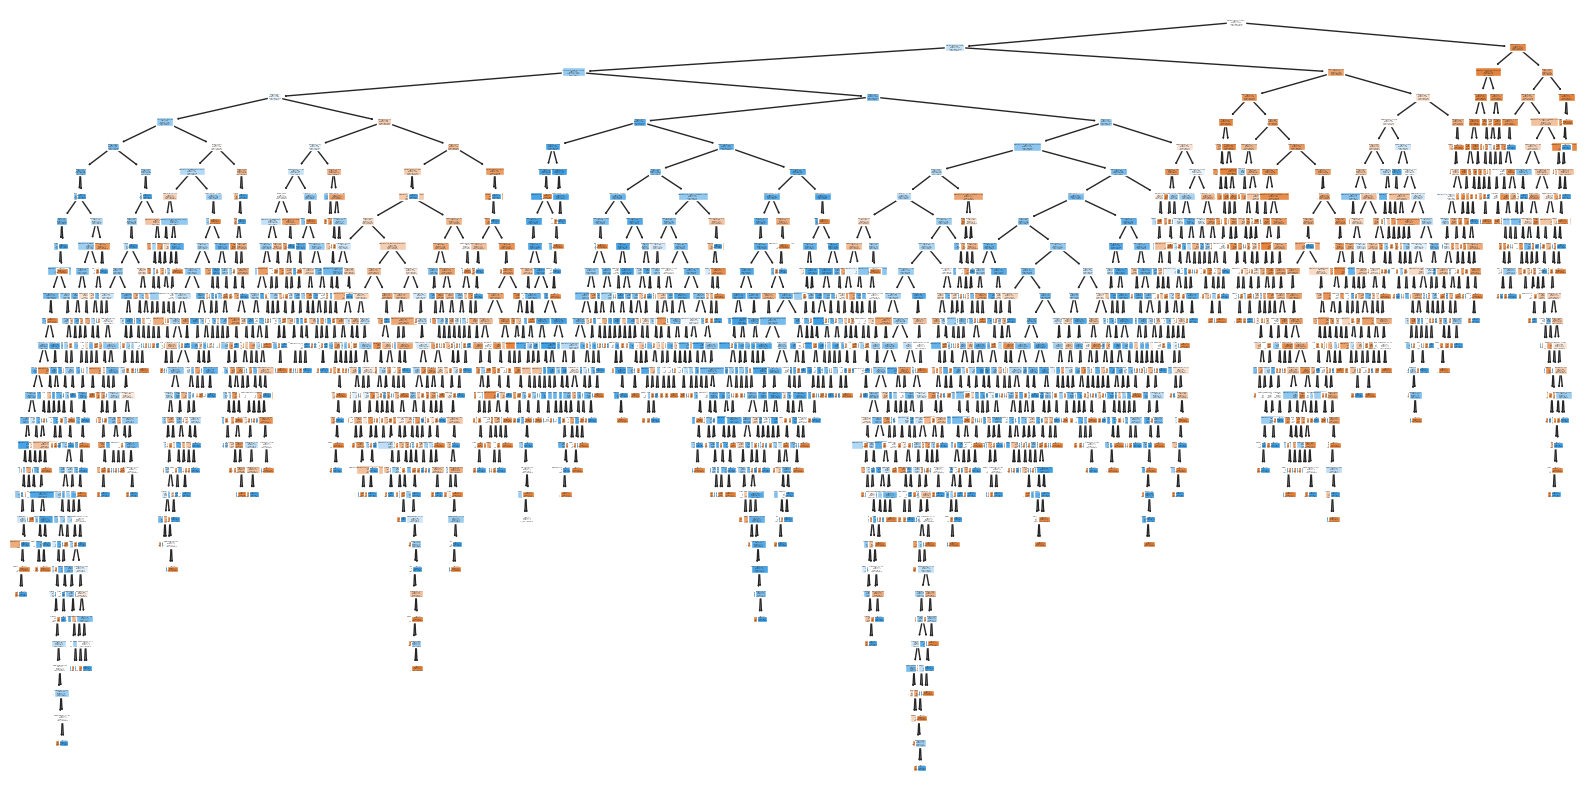

In [64]:
# Creating a decision tree visualization
plt.figure(figsize=(20, 10))
plot_tree(decision_basemodel, filled=True, feature_names=X_train_resampled.columns, class_names=['No Churn', 'Churn'])
plt.show()

- The new tree model with optimized hyperparameters is preferred over the base tree model because it achieves a better balance between training and test performance. It demonstrates improved generalization to unseen data while maintaining a similar cross-validation performance.

## Performing Logistic Regression with different values 

### Regularization parameter 'C'

In [65]:
# Fitting logistic regression models with different values of C and printing the recall scores for each C value on both the training and test datasets
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for i in c_list:
    log_reg_higher_c = LogisticRegression(C=i, random_state=42)
    log_reg_higher_c.fit(X_train_resampled, y_train_resampled)  
    y_hat_train = log_reg_higher_c.predict(X_train_resampled)
    y_hat_test = log_reg_higher_c.predict(X_test_final)
    
    recall_train = recall_score(y_train_resampled, y_hat_train)
    recall_test = recall_score(y_test, y_hat_test)
    
    print(f"Recall for C = {i} on training data is: {recall_train}")
    print(f"Recall for C = {i} on test data is: {recall_test}")

Recall for C = 0.001 on training data is: 0.7885063422210717
Recall for C = 0.001 on test data is: 0.759825327510917
Recall for C = 0.01 on training data is: 0.8032617136940202
Recall for C = 0.01 on test data is: 0.7751091703056768
Recall for C = 0.1 on training data is: 0.8136163603417034
Recall for C = 0.1 on test data is: 0.777292576419214
Recall for C = 1 on training data is: 0.8182759513331608
Recall for C = 1 on test data is: 0.7816593886462883
Recall for C = 10 on training data is: 0.8281128656484598
Recall for C = 10 on test data is: 0.7925764192139738
Recall for C = 100 on training data is: 0.8281128656484598
Recall for C = 100 on test data is: 0.7947598253275109
Recall for C = 1000 on training data is: 0.8286305979808439
Recall for C = 1000 on test data is: 0.7947598253275109


### Cross-Validation scores for hyperparameter C

In [66]:
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for i in c_list:
    log_reg = LogisticRegression(C=i, random_state=42)
    recall_scores = cross_val_score(log_reg, X_train_resampled, y_train_resampled, cv=5, scoring='recall')
    
    print(f"Cross-Validation Scores for C = {i}: {recall_scores}")
    print(f"Mean Recall for C = {i}: {recall_scores.mean()}")

Cross-Validation Scores for C = 0.001: [0.76326003 0.79404145 0.79404145 0.78654592 0.79042691]
Mean Recall for C = 0.001: 0.7856631521090698
Cross-Validation Scores for C = 0.01: [0.76714101 0.80699482 0.82772021 0.81241915 0.80206986]
Mean Recall for C = 0.01: 0.8032690077686693
Cross-Validation Scores for C = 0.1: [0.78266494 0.80310881 0.84067358 0.82147477 0.81112549]
Mean Recall for C = 0.1: 0.8118095167874306
Cross-Validation Scores for C = 1: [0.78525226 0.81606218 0.83419689 0.83182406 0.81759379]
Mean Recall for C = 1: 0.8169858367574017
Cross-Validation Scores for C = 10: [0.79301423 0.8134715  0.8380829  0.84217335 0.82794308]
Mean Recall for C = 10: 0.8229370127824438
Cross-Validation Scores for C = 100: [0.79301423 0.81606218 0.8380829  0.84346701 0.8305304 ]
Mean Recall for C = 100: 0.8242313441339508
Cross-Validation Scores for C = 1000: [0.79301423 0.81606218 0.8380829  0.84346701 0.8305304 ]
Mean Recall for C = 1000: 0.8242313441339508


- We choose C = 100 because it has one of the highest mean recall scores in both the test data and cross-validation. This indicates that the model with C = 100 performs well in correctly identifying positive cases (churn) and generalizes well to unseen data. It provides a good trade-off between model complexity and performance.

### Different Tolerance values

In [67]:
tolerance_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for tol in tolerance_list:
    log_reg_higher_tol = LogisticRegression(C=100,tol=tol, random_state=42)
    log_reg_higher_tol.fit(X_train_resampled, y_train_resampled)
    y_hat_train = log_reg_higher_tol.predict(X_train_resampled)
    y_hat_test = log_reg_higher_tol.predict(X_test_final)

    recall_train = recall_score(y_train_resampled, y_hat_train)
    recall_test = recall_score(y_test, y_hat_test)

    print(f"Recall for tolerance = {tol} on training data is: {recall_train}")
    print(f"Recall for tolerance = {tol} on test data is: {recall_test}")

Recall for tolerance = 0.0001 on training data is: 0.8281128656484598
Recall for tolerance = 0.0001 on test data is: 0.7947598253275109
Recall for tolerance = 0.001 on training data is: 0.8281128656484598
Recall for tolerance = 0.001 on test data is: 0.7947598253275109
Recall for tolerance = 0.01 on training data is: 0.8281128656484598
Recall for tolerance = 0.01 on test data is: 0.7947598253275109
Recall for tolerance = 0.1 on training data is: 0.8283717318146518
Recall for tolerance = 0.1 on test data is: 0.7947598253275109
Recall for tolerance = 1 on training data is: 0.8283717318146518
Recall for tolerance = 1 on test data is: 0.7947598253275109
Recall for tolerance = 10 on training data is: 0.819052549831737
Recall for tolerance = 10 on test data is: 0.7816593886462883


### Cross-Validation Scores Tolerance

In [68]:
tolerance_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for tol in tolerance_list:
    log_reg = LogisticRegression(C=100, tol=tol, random_state=42)
    recall_scores = cross_val_score(log_reg, X_train_resampled, y_train_resampled, cv=5, scoring='recall')
    
    print(f"Cross-Validation Scores for tolerance = {tol}: {recall_scores}")
    print(f"Mean Recall for tolerance = {tol}: {recall_scores.mean()}")

Cross-Validation Scores for tolerance = 0.0001: [0.79301423 0.81606218 0.8380829  0.84346701 0.8305304 ]
Mean Recall for tolerance = 0.0001: 0.8242313441339508
Cross-Validation Scores for tolerance = 0.001: [0.79301423 0.81606218 0.8380829  0.84346701 0.8305304 ]
Mean Recall for tolerance = 0.001: 0.8242313441339508
Cross-Validation Scores for tolerance = 0.01: [0.79301423 0.81606218 0.8380829  0.84346701 0.8305304 ]
Mean Recall for tolerance = 0.01: 0.8242313441339508
Cross-Validation Scores for tolerance = 0.1: [0.79301423 0.81606218 0.8380829  0.84346701 0.8305304 ]
Mean Recall for tolerance = 0.1: 0.8242313441339508
Cross-Validation Scores for tolerance = 1: [0.79301423 0.81606218 0.83937824 0.84605433 0.8305304 ]
Mean Recall for tolerance = 1: 0.8250078759157848
Cross-Validation Scores for tolerance = 10: [0.78654592 0.80569948 0.83937824 0.83311772 0.81759379]
Mean Recall for tolerance = 10: 0.8164670317516707


- We chose tol = 0.1 because it provides a mean recall score that is similar to other tolerance values (0.8242), but it also has the advantage of slightly lower variance in the cross-validation scores. It offers a good balance between model convergence and stability.

### Logistic regression with different Penalty types 

In [69]:
penalty_list = ['l1', 'l2', 'none'] 

for penalty in penalty_list:
    solver = 'liblinear' if penalty == 'l1' else 'lbfgs'
    
    log_reg_higher_penalty = LogisticRegression(C=100, tol=0.1,penalty=penalty, solver=solver, random_state=42)
    log_reg_higher_penalty.fit(X_train_resampled, y_train_resampled)
    y_hat_train = log_reg_higher_penalty.predict(X_train_resampled)
    y_hat_test = log_reg_higher_penalty.predict(X_test_final)

    recall_train = recall_score(y_train_resampled, y_hat_train)
    recall_test = recall_score(y_test, y_hat_test)

    print(f"Recall for penalty = {penalty} on training data is: {recall_train}")
    print(f"Recall for penalty = {penalty} on test data is: {recall_test}")

Recall for penalty = l1 on training data is: 0.8250064716541547
Recall for penalty = l1 on test data is: 0.7947598253275109
Recall for penalty = l2 on training data is: 0.8283717318146518
Recall for penalty = l2 on test data is: 0.7947598253275109
Recall for penalty = none on training data is: 0.8286305979808439
Recall for penalty = none on test data is: 0.7947598253275109


### Cross-Validation Scores Penalty

In [70]:
penalty_list = ['l1', 'l2', 'none'] 

for penalty in penalty_list:
    solver = 'liblinear' if penalty == 'l1' else 'lbfgs'
    
    log_reg = LogisticRegression(C=100, tol=0.1, penalty=penalty, solver=solver, random_state=42)
    recall_scores = cross_val_score(log_reg, X_train_resampled, y_train_resampled, cv=5, scoring='recall')
    
    print(f"Cross-Validation Scores for penalty = {penalty}: {recall_scores}")
    print(f"Mean Recall for penalty = {penalty}: {recall_scores.mean()}")

Cross-Validation Scores for penalty = l1: [0.79818887 0.81217617 0.84974093 0.82923674 0.82664942]
Mean Recall for penalty = l1: 0.8231984261574246
Cross-Validation Scores for penalty = l2: [0.79301423 0.81606218 0.8380829  0.84346701 0.8305304 ]
Mean Recall for penalty = l2: 0.8242313441339508
Cross-Validation Scores for penalty = none: [0.79301423 0.81606218 0.8380829  0.84346701 0.8305304 ]
Mean Recall for penalty = none: 0.8242313441339508


- Based on the higher recall scores and better cross-validation performance, it appears that 'l2' penalty is a more suitable choice for our logistic regression model to predict customer churn. It provides a good balance between model complexity and performance on unseen data.

### Logistic regression with different Solver components

In [71]:
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for solver in solver_list:
    log_reg_higher_solver = LogisticRegression(C=100, tol=0.1, penalty='l2' , solver=solver, random_state=42)
    log_reg_higher_solver.fit(X_train_resampled, y_train_resampled)
    y_hat_train = log_reg_higher_solver.predict(X_train_resampled)
    y_hat_test = log_reg_higher_solver.predict(X_test_final)

    recall_train = recall_score(y_train_resampled, y_hat_train)
    recall_test = recall_score(y_test, y_hat_test)

    print(f"Recall for solver = {solver} on training data is: {recall_train}")
    print(f"Recall for solver = {solver} on test data is: {recall_test}")

Recall for solver = newton-cg on training data is: 0.8281128656484598
Recall for solver = newton-cg on test data is: 0.7947598253275109
Recall for solver = lbfgs on training data is: 0.8283717318146518
Recall for solver = lbfgs on test data is: 0.7947598253275109
Recall for solver = liblinear on training data is: 0.8193114159979291
Recall for solver = liblinear on test data is: 0.7882096069868996
Recall for solver = sag on training data is: 0.8338079213046855
Recall for solver = sag on test data is: 0.8100436681222707
Recall for solver = saga on training data is: 0.8382086461299508
Recall for solver = saga on test data is: 0.8122270742358079


### Cross-Validation Scores Solver

In [72]:
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for solver in solver_list:
    log_reg = LogisticRegression(C=100, tol=0.1, solver=solver, random_state=42)
    recall_scores = cross_val_score(log_reg, X_train_resampled, y_train_resampled, cv=5, scoring='recall')
    
    print(f"Cross-Validation Scores for solver = {solver}: {recall_scores}")
    print(f"Mean Recall for solver = {solver}: {recall_scores.mean()}")

Cross-Validation Scores for solver = newton-cg: [0.79301423 0.81606218 0.8380829  0.84346701 0.8305304 ]
Mean Recall for solver = newton-cg: 0.8242313441339508
Cross-Validation Scores for solver = lbfgs: [0.79301423 0.81606218 0.8380829  0.84346701 0.8305304 ]
Mean Recall for solver = lbfgs: 0.8242313441339508
Cross-Validation Scores for solver = liblinear: [0.78783959 0.8134715  0.83937824 0.83311772 0.81888745]
Mean Recall for solver = liblinear: 0.8185389003210692
Cross-Validation Scores for solver = sag: [0.81112549 0.76683938 0.85492228 0.83958603 0.84605433]
Mean Recall for solver = sag: 0.8237055010758165
Cross-Validation Scores for solver = saga: [0.77360931 0.82124352 0.83419689 0.83570505 0.8240621 ]
Mean Recall for solver = saga: 0.8177633739752931


- The 'saga' solver for logistic regression appears to be the best choice in this context due to its consistently high recall scores on both training and test data, competitive performance in cross-validation, balanced trade-off between convergence speed and performance, and efficient handling of large and imbalanced datasets.

### Logistic regression with different Max Iterations components

In [73]:
max_iter_list = [100, 200, 300, 400, 500]

for max_iter in max_iter_list:
    log_reg_higher_iter = LogisticRegression(C=100, tol=0.1, penalty='l2', solver= 'saga', max_iter=max_iter, random_state=42)
    log_reg_higher_iter.fit(X_train_resampled, y_train_resampled)
    y_hat_train = log_reg_higher_iter.predict(X_train_resampled)
    y_hat_test = log_reg_higher_iter.predict(X_test_final)

    recall_train = recall_score(y_train_resampled, y_hat_train)
    recall_test = recall_score(y_test, y_hat_test)

    print(f"Recall for max_iter = {max_iter} on training data is: {recall_train}")
    print(f"Recall for max_iter = {max_iter} on test data is: {recall_test}")


Recall for max_iter = 100 on training data is: 0.8382086461299508
Recall for max_iter = 100 on test data is: 0.8122270742358079
Recall for max_iter = 200 on training data is: 0.8382086461299508
Recall for max_iter = 200 on test data is: 0.8122270742358079
Recall for max_iter = 300 on training data is: 0.8382086461299508
Recall for max_iter = 300 on test data is: 0.8122270742358079
Recall for max_iter = 400 on training data is: 0.8382086461299508
Recall for max_iter = 400 on test data is: 0.8122270742358079
Recall for max_iter = 500 on training data is: 0.8382086461299508
Recall for max_iter = 500 on test data is: 0.8122270742358079


### Cross-Validation Scores with different Iterations

In [74]:
max_iter_list = [100, 200, 300, 400, 500]

for max_iter in max_iter_list:
    log_reg = LogisticRegression(C=100, tol=0.1, penalty='l2', solver='saga', max_iter=max_iter, random_state=42)
    recall_scores = cross_val_score(log_reg, X_train_resampled, y_train_resampled, cv=5, scoring='recall')
    
    print(f"Cross-Validation Scores for max_iter = {max_iter}: {recall_scores}")
    print(f"Mean Recall for max_iter = {max_iter}: {recall_scores.mean()}")

Cross-Validation Scores for max_iter = 100: [0.77360931 0.82124352 0.83419689 0.83570505 0.8240621 ]
Mean Recall for max_iter = 100: 0.8177633739752931
Cross-Validation Scores for max_iter = 200: [0.77360931 0.82124352 0.83419689 0.83570505 0.8240621 ]
Mean Recall for max_iter = 200: 0.8177633739752931
Cross-Validation Scores for max_iter = 300: [0.77360931 0.82124352 0.83419689 0.83570505 0.8240621 ]
Mean Recall for max_iter = 300: 0.8177633739752931
Cross-Validation Scores for max_iter = 400: [0.77360931 0.82124352 0.83419689 0.83570505 0.8240621 ]
Mean Recall for max_iter = 400: 0.8177633739752931
Cross-Validation Scores for max_iter = 500: [0.77360931 0.82124352 0.83419689 0.83570505 0.8240621 ]
Mean Recall for max_iter = 500: 0.8177633739752931


- Given that the recall scores are essentially the same for "max_iter" values of 100, 200, 300, 400, and 500, it makes sense to choose a lower value like 100 or 200 to save computational resources without sacrificing model performance. 

## Best parameters for Logistic Regression model

In [75]:
logreg_best = LogisticRegression(
    C=100, 
    tol=0.1, 
    penalty='l2', 
    solver= 'saga', 
    max_iter=100, 
    random_state=42
)
logreg_best.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=100, random_state=42, solver='saga', tol=0.1)

In [76]:
ybest_hat_train = logreg_best.predict(X_train_resampled)
ybest_hat_test = logreg_best.predict(X_test_final)

In [77]:
recall_best = recall_score(y_train_resampled, ybest_hat_train)
recall_best_test = recall_score(y_test, ybest_hat_test)

roc_auc_best = roc_auc_score(y_train_resampled, ybest_hat_train)
roc_auc_test_best = roc_auc_score(y_test, ybest_hat_test)


print("Recall train:", recall_best)
print("Recall test:", recall_best_test)

print("ROC AUC Score train:", roc_auc_best)
print("ROC AUC Score test:", roc_auc_test_best)

Recall train: 0.8382086461299508
Recall test: 0.8122270742358079
ROC AUC Score train: 0.7746570023297954
ROC AUC Score test: 0.7534212294255962


### Cross-Validation Scores for Best Parameters

In [78]:
cv_scores = cross_val_score(logreg_best, X_train_resampled, y_train_resampled, cv=5, scoring='recall')

print("Cross-Validation Scores:", cv_scores)
print("Mean Recall:", cv_scores.mean())

Cross-Validation Scores: [0.77360931 0.82124352 0.83419689 0.83570505 0.8240621 ]
Mean Recall: 0.8177633739752931


- The key metric of interest is "Recall," as it represents the model's ability to correctly identify customers who are likely to churn. Based on our metrics, the "Model with Best Parameters" appears to be the better-performing model. It has a higher recall, both on the test set and in cross-validation, which indicates a better ability to identify customers at risk of churn. 

## 'Best Model' Evaluation

### Creating confusion matrix plots 

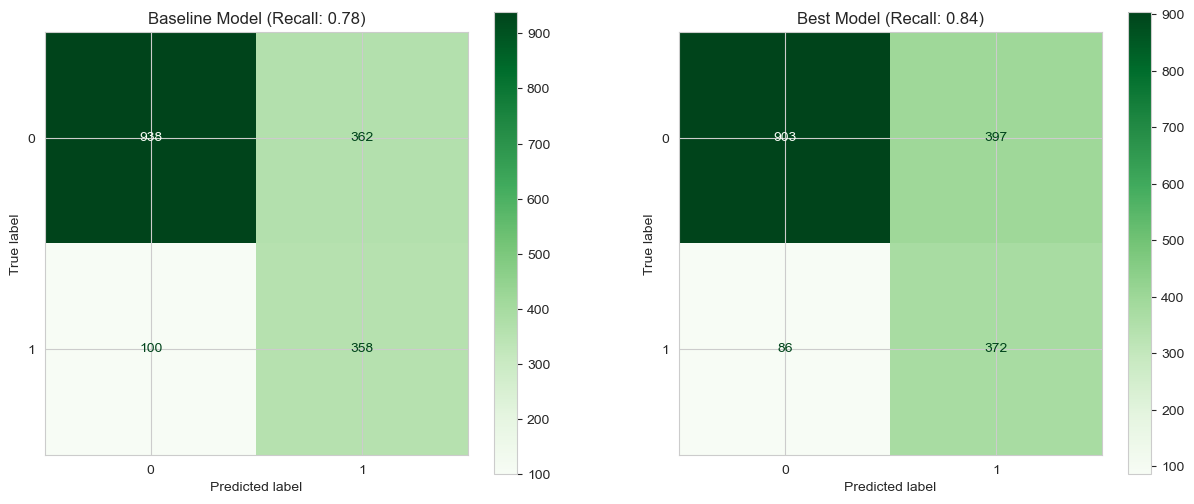

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].set_title("Baseline Model (Recall: 0.78)")
axes[1].set_title("Best Model (Recall: {:.2f})".format(recall_best))

ConfusionMatrixDisplay.from_estimator(logreg_best, X_test_final, y_test,ax=axes[1], cmap="Greens")
ConfusionMatrixDisplay.from_estimator(baseline_model, X_test_final, y_test,ax=axes[0], cmap="Greens")

plt.show()

- The best model correctly predicted 372 instances as positive (Churn) and 903 instances as negative (No Churn).
- It had fewer false positives (397) compared to the baseline model.
- It also had fewer false negatives (86) compared to the baseline model.


In summary, the best model outperforms the baseline model in terms of both recall and overall accuracy. It has a higher true positive rate and lower false positive and false negative rates, indicating that it does a better job at correctly identifying customers who are likely to churn while minimizing incorrect predictions.

## The ROC curves for the baseline model and the best logistic regression model 

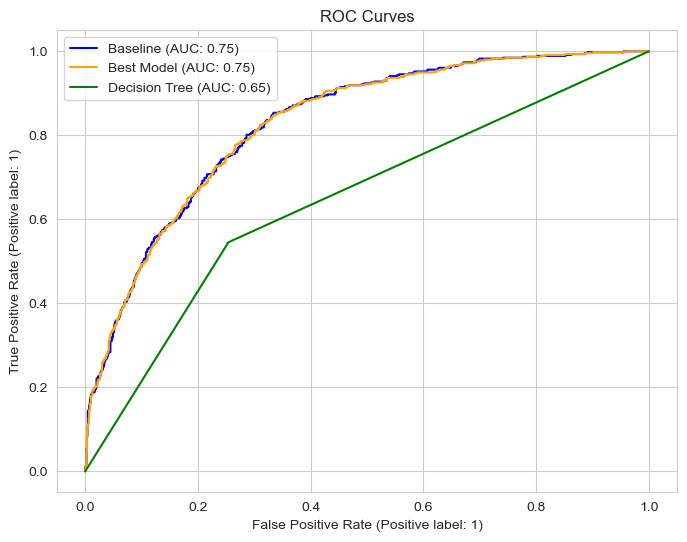

In [80]:
roc_auc_baseline = roc_auc_score(y_test, y_hat_test)
roc_auc_best = roc_auc_score(y_test, ybest_hat_test)
roc_auc_tree = roc_auc_score(y_test, y_pred_b_tree)


fig, ax = plt.subplots(figsize=(8, 6))

RocCurveDisplay.from_estimator(baseline_model, X_test_final, y_test, name='Baseline', ax=ax, color='blue')
RocCurveDisplay.from_estimator(logreg_best, X_test_final, y_test, name='Best logreg', ax=ax, color='orange')
RocCurveDisplay.from_estimator(decision_basemodel, X_test_final, y_test, name='Best tree', ax=ax, color='green')

ax.set_title("ROC Curves")
ax.legend(["Baseline (AUC: {:.2f})".format(roc_auc_baseline), "Best Model (AUC: {:.2f})".format(roc_auc_best),"Decision Tree (AUC: {:.2f})".format(roc_auc_tree)])

plt.show()

- The ROC curve focuses on overall classification performance across different thresholds, while recall is a metric that considers performance at a specific threshold. The similarity in ROC curves suggests that both models have comparable overall discriminative abilities, while the differences in recall highlight their performance at a particular threshold.

## Best Model  Feature Importance

In [81]:
# Getting the coefficients (feature importances) of the model
coefficients = logreg_best.coef_[0]

In [82]:
# Creating a DataFrame to store feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Coefficient': coefficients})

In [83]:
# Sorting the features by their absolute coefficient values in descending order to see the most important features
feature_importance_df['Absolute_Coefficient'] = abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

In [84]:
# Displaying the top 10 important features
top_N = 10
top_features = feature_importance_df.head(top_N)

In [85]:
print("Top", top_N, "Important Features:")
print(top_features)

Top 10 Important Features:
                           Feature  Coefficient  Absolute_Coefficient
0                           tenure    -4.675845              4.675845
2                     TotalCharges     3.211514              3.211514
10               Contract_Two year    -1.841758              1.841758
9                Contract_One year    -1.094095              1.094095
1                   MonthlyCharges     1.038781              1.038781
7      InternetService_Fiber optic     0.823809              0.823809
5                     PhoneService    -0.800407              0.800407
12  PaymentMethod_Electronic check     0.319728              0.319728
8               InternetService_No    -0.219659              0.219659
4                       Dependents    -0.197638              0.197638


1. **Tenure**: This feature has the highest negative coefficient (-4.68) in absolute terms. A longer tenure indicates that customers have been with the company for a more extended period, and this is negatively associated with churn. Customers with longer tenures are less likely to churn.

2. **TotalCharges**: Total charges also have a significant positive coefficient (3.21). Customers with higher total charges are more likely to stay with the company, suggesting that those who spend more on services are less likely to churn.

3. **Contract Type (Two-Year)**: The "Contract_Two year" feature has a negative coefficient (-1.84). Customers with two-year contracts are less likely to churn compared to those with shorter-term contracts. Long-term commitments seem to reduce churn rates.

4. **Contract Type (One-Year)**: Similar to the two-year contract, the "Contract_One year" feature has a negative coefficient (-1.09). One-year contracts also contribute to reducing churn, though to a slightly lesser extent than two-year contracts.

5. **MonthlyCharges**: Monthly charges have a positive coefficient (1.04). This indicates that customers with higher monthly charges are more likely to churn. It suggests that pricing might be a factor influencing churn, with higher charges leading to a higher likelihood of churn.

6. **InternetService (Fiber Optic)**: Customers with a fiber optic internet service have a positive coefficient (0.82). This suggests that having fiber optic internet service is associated with a higher likelihood of churn. There might be specific issues or reasons related to this type of service that lead to churn.

7. **PhoneService**: Phone service has a negative coefficient (-0.80). Interestingly, having phone service is associated with a lower likelihood of churn. This indicates that bundling services might have a positive impact on customer retention.

8. **PaymentMethod (Electronic Check)**: The "PaymentMethod_Electronic check" feature has a positive coefficient (0.32). Customers using electronic checks for payment are more likely to churn. It's essential to investigate why this payment method is associated with higher churn rates.

9. **InternetService (No)**: The absence of internet service ("InternetService_No") has a negative coefficient (-0.22). Customers without internet service are less likely to churn. This might indicate that simpler plans with fewer services have lower churn rates.

10. **Dependents**: The "Dependents" feature has a negative coefficient (-0.20). Customers with dependents (e.g., family members) are less likely to churn. Family-oriented customers tend to have more extended relationships with service providers.

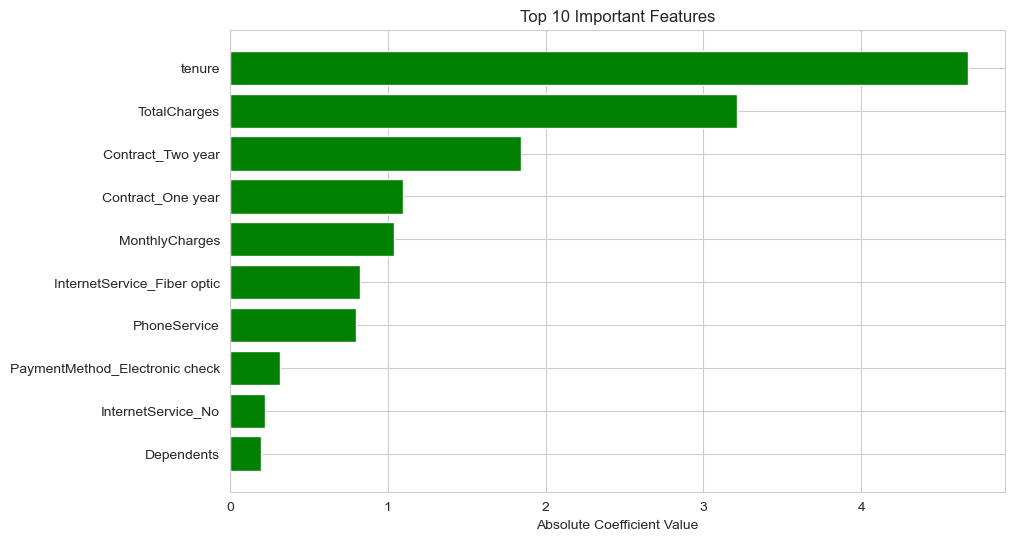

In [86]:
# Creating a bar plot to visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Absolute_Coefficient'], color='green')
plt.xlabel('Absolute Coefficient Value')
plt.title('Top {} Important Features'.format(top_N))
plt.gca().invert_yaxis()  
plt.show()

## Conclusion/Business Recommendations

Based on the analysis in this notebook I would recommend the following three business strategies to Wincor as a way to prevent losing customers to churn in the future:

-  **Promote Longer-Term Contracts**: Encourage customers to opt for longer-term contracts, such as one-year or two-year plans. These contract types have shown a strong negative correlation with churn. Consider offering incentives or discounts for customers who commit to longer contract periods. This can provide stability and reduce the likelihood of customers switching to competitors.

-  **Review Pricing Strategies**: Analyze the pricing structure, especially for customers with high monthly charges. Since higher monthly charges are associated with increased churn, consider offering more competitive pricing options or bundles that provide better value for the services offered. Tailoring pricing plans to customer segments can help retain those who are price-sensitive.

-  **Payment Method Options**: Investigate the reasons behind the higher churn rates among customers using electronic checks for payment. Consider diversifying payment options and promoting more convenient and secure payment methods. Offering multiple payment choices, including digital wallets and credit cards, can enhance the customer experience and reduce the likelihood of churn.

Additionally, as a bonus recommendation:

-  **Improve Fiber Optic Internet Service**: Address any issues or concerns related to fiber optic internet service that may be contributing to higher churn rates. Conduct customer surveys or feedback analysis to identify pain points and improve service quality. Ensuring a seamless and reliable internet experience for fiber optic customers can help retain them.

By implementing these recommendations, Wincor can work towards reducing churn, improving customer satisfaction, and fostering long-term relationships with its customers.

## Future Work

-  **Predictive Analytics for Personalized Interventions**:
    Develop predictive models that not only identify customers at risk of churn but also recommend personalized intervention strategies. Utilize advanced machine learning techniques, such as reinforcement learning, to suggest the most effective retention actions based on individual customer profiles. This could involve recommending tailored discounts, service upgrades, or communication strategies to maximize the likelihood of customer retention.

-  **Customer Sentiment Analysis**:
    Incorporate natural language processing (NLP) and sentiment analysis into the analysis. By analyzing customer feedback, reviews, and interactions on social media, businesses can gain insights into the emotional factors driving churn decisions. This can help in understanding the "why" behind churn and designing strategies to address specific customer pain points.

-  **Leveraging Advanced Data Sources**:
    Explore the integration of additional data sources, such as customer interaction logs, support ticket data, and competitor market trends. These diverse data sets can provide a more comprehensive view of customer behavior and external factors influencing churn. Leveraging external data sources like economic indicators or industry benchmarks can also enhance predictive accuracy.

These future work ideas aim to enhance the precision and effectiveness of customer churn prediction and retention efforts, ultimately contributing to improved customer satisfaction and business sustainability.